# 14장. 텐서플로의 구조 자세히 알아보기

**아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch14/ch14.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch14/ch14.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

`watermark`는 주피터 노트북에 사용하는 파이썬 패키지를 출력하기 위한 유틸리티입니다. `watermark` 패키지를 설치하려면 다음 셀의 주석을 제거한 뒤 실행하세요.

In [ ]:
#!pip install watermark

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,tensorflow,matplotlib

last updated: 2019-04-26 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.3
tensorflow 2.0.0-alpha0
matplotlib 3.0.3


**이 노트북을 실행하려면 텐서플로 2.0.0-alpha0 버전 이상이 필요합니다. 이전 버전의 텐서플로가 설치되어 있다면 다음 셀의 주석을 제거한 뒤 실행하세요.**

In [ ]:
#!pip install tensorflow==2.0.0-alpha0

**코랩을 사용할 때는 다음 셀의 주석을 제거하고 GPU 버전의 텐서플로 2.0.0-alpha0 버전을 설치하세요.**

In [ ]:
#!pip install tensorflow-gpu==2.0.0-alpha0

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## 텐서플로의 랭크와 텐서

**텐서의 랭크와 크기를 확인하는 방법**

In [3]:
## t1, t2, t3 텐서를 정의합니다.
t1 = tf.constant(np.pi)
t2 = tf.constant([1, 2, 3, 4])
t3 = tf.constant([[1, 2], [3, 4]])

## 랭크를 구합니다.
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()
print('크기:', s1, s2, s3)

print('랭크:', 
      r1.numpy(), 
      r2.numpy(), 
      r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## 텐서를 다차원 배열로 변환하기

In [4]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)
T2 = tf.Variable(np.random.normal(size=s))
print(T2)
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[-1.56031182, -0.4062809 , -1.6999721 , -2.00474024],
       [ 0.947475  ,  0.43933616, -0.67149514,  0.84266056],
       [-1.66740741,  0.13284443,  0.31757109,  0.22374017]])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([ 0.48029285,  2.13158375, -0.59716179])>


In [5]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)
T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [6]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)
T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [7]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2, 
                   axis=2)
print(t5_splt)

[<tf.Tensor: id=46, shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: id=47, shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [8]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## 텐서플로의 계산 그래프 이해하기

In [9]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


In [10]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


In [11]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>]

In [12]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

In [13]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2) 
    c = tf.constant(3) 

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [14]:
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [15]:
def simple_func():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    return z

simple_func = tf.function(simple_func)

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [16]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'Identity' type=Identity>]

In [17]:
con_func.graph.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

## 텐서플로의 변수

In [18]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int64>


In [19]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

In [20]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [21]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int64)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


In [22]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [23]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [24]:
print(w2 + 1)

tf.Tensor(
[[2 3 4 5]
 [6 7 8 9]], shape=(2, 4), dtype=int64)


In [25]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


In [26]:
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int64, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


## tf.keras API 자세히 배우기

### Sequential 모델

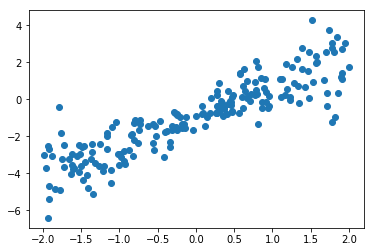

In [27]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [28]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [29]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 2ms/sample - loss: 14.0320 - val_loss: 9.5872
Epoch 2/300
105/105 [==============================] - 0s 110us/sample - loss: 13.7564 - val_loss: 9.4046
Epoch 3/300
105/105 [==============================] - 0s 95us/sample - loss: 13.4774 - val_loss: 9.2176
Epoch 4/300
105/105 [==============================] - 0s 189us/sample - loss: 13.1906 - val_loss: 9.0369
Epoch 5/300
105/105 [==============================] - 0s 214us/sample - loss: 12.9188 - val_loss: 8.8704
Epoch 6/300
105/105 [==============================] - 0s 164us/sample - loss: 12.6598 - val_loss: 8.7153
Epoch 7/300
105/105 [==============================] - 0s 267us/sample - loss: 12.4207 - val_loss: 8.5550
Epoch 8/300
105/105 [==============================] - 0s 187us/sample - loss: 12.1727 - val_loss: 8.3871
Epoch 9/300
105/105 [==============================] - 0s 161us/sample - loss: 11.9209 - val_loss: 8.2399
Epoc

Epoch 78/300
105/105 [==============================] - 0s 88us/sample - loss: 3.2802 - val_loss: 2.6651
Epoch 79/300
105/105 [==============================] - 0s 84us/sample - loss: 3.2206 - val_loss: 2.6304
Epoch 80/300
105/105 [==============================] - 0s 95us/sample - loss: 3.1685 - val_loss: 2.5958
Epoch 81/300
105/105 [==============================] - 0s 92us/sample - loss: 3.1170 - val_loss: 2.5636
Epoch 82/300
105/105 [==============================] - 0s 88us/sample - loss: 3.0688 - val_loss: 2.5305
Epoch 83/300
105/105 [==============================] - 0s 113us/sample - loss: 3.0189 - val_loss: 2.4964
Epoch 84/300
105/105 [==============================] - 0s 83us/sample - loss: 2.9696 - val_loss: 2.4676
Epoch 85/300
105/105 [==============================] - 0s 89us/sample - loss: 2.9256 - val_loss: 2.4337
Epoch 86/300
105/105 [==============================] - 0s 105us/sample - loss: 2.8753 - val_loss: 2.4002
Epoch 87/300
105/105 [==============================]

105/105 [==============================] - 0s 81us/sample - loss: 0.8413 - val_loss: 0.9907
Epoch 233/300
105/105 [==============================] - 0s 91us/sample - loss: 0.8399 - val_loss: 0.9889
Epoch 234/300
105/105 [==============================] - 0s 92us/sample - loss: 0.8383 - val_loss: 0.9885
Epoch 235/300
105/105 [==============================] - 0s 86us/sample - loss: 0.8370 - val_loss: 0.9868
Epoch 236/300
105/105 [==============================] - 0s 89us/sample - loss: 0.8352 - val_loss: 0.9851
Epoch 237/300
105/105 [==============================] - 0s 78us/sample - loss: 0.8334 - val_loss: 0.9839
Epoch 238/300
105/105 [==============================] - 0s 86us/sample - loss: 0.8320 - val_loss: 0.9831
Epoch 239/300
105/105 [==============================] - 0s 81us/sample - loss: 0.8306 - val_loss: 0.9821
Epoch 240/300
105/105 [==============================] - 0s 95us/sample - loss: 0.8294 - val_loss: 0.9808
Epoch 241/300
105/105 [==============================] - 0s 

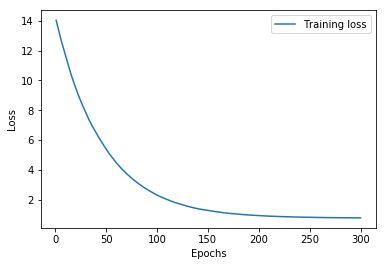

In [32]:
epochs = np.arange(1, 300+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 함수형 API

In [33]:
input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

model = tf.keras.Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 1ms/sample - loss: 5.4181 - val_loss: 3.5963
Epoch 2/300
105/105 [==============================] - 0s 162us/sample - loss: 5.3235 - val_loss: 3.5440
Epoch 3/300
105/105 [==============================] - 0s 173us/sample - loss: 5.2317 - val_loss: 3.4873
Epoch 4/300
105/105 [==============================] - 0s 121us/sample - loss: 5.1341 - val_loss: 3.4279
Epoch 5/300
105/105 [==============================] - 0s 164us/sample - loss: 5.0330 - val_loss: 3.3742
Epoch 6/300
105/105 [==============================] - 0s 164us/sample - loss: 4.9416 - val_loss: 3.3257
Epoch 7/300
105/105 [==============================] - 0s 196us/sample - loss: 4.8583 - val_loss: 3.2727
Epoch 8/300
105/105 [==============================] - 0s 175us/sample - loss: 4.7664 - val_loss: 3.2235
Epoch 9/300
105/105 [==============================] - 0s 125us/sample - loss: 4.6841 - val_loss: 3.1733
Epoch 10/300

105/105 [==============================] - 0s 78us/sample - loss: 1.6559 - val_loss: 1.4253
Epoch 79/300
105/105 [==============================] - 0s 82us/sample - loss: 1.6368 - val_loss: 1.4130
Epoch 80/300
105/105 [==============================] - 0s 98us/sample - loss: 1.6163 - val_loss: 1.4024
Epoch 81/300
105/105 [==============================] - 0s 80us/sample - loss: 1.5974 - val_loss: 1.3908
Epoch 82/300
105/105 [==============================] - 0s 88us/sample - loss: 1.5788 - val_loss: 1.3821
Epoch 83/300
105/105 [==============================] - 0s 87us/sample - loss: 1.5636 - val_loss: 1.3725
Epoch 84/300
105/105 [==============================] - 0s 90us/sample - loss: 1.5476 - val_loss: 1.3634
Epoch 85/300
105/105 [==============================] - 0s 77us/sample - loss: 1.5319 - val_loss: 1.3531
Epoch 86/300
105/105 [==============================] - 0s 83us/sample - loss: 1.5135 - val_loss: 1.3428
Epoch 87/300
105/105 [==============================] - 0s 82us/samp

105/105 [==============================] - 0s 94us/sample - loss: 0.7905 - val_loss: 0.9180
Epoch 233/300
105/105 [==============================] - 0s 84us/sample - loss: 0.7897 - val_loss: 0.9177
Epoch 234/300
105/105 [==============================] - 0s 92us/sample - loss: 0.7891 - val_loss: 0.9166
Epoch 235/300
105/105 [==============================] - 0s 81us/sample - loss: 0.7881 - val_loss: 0.9165
Epoch 236/300
105/105 [==============================] - 0s 82us/sample - loss: 0.7876 - val_loss: 0.9160
Epoch 237/300
105/105 [==============================] - 0s 85us/sample - loss: 0.7869 - val_loss: 0.9164
Epoch 238/300
105/105 [==============================] - 0s 69us/sample - loss: 0.7867 - val_loss: 0.9160
Epoch 239/300
105/105 [==============================] - 0s 82us/sample - loss: 0.7862 - val_loss: 0.9158
Epoch 240/300
105/105 [==============================] - 0s 78us/sample - loss: 0.7858 - val_loss: 0.9154
Epoch 241/300
105/105 [==============================] - 0s 

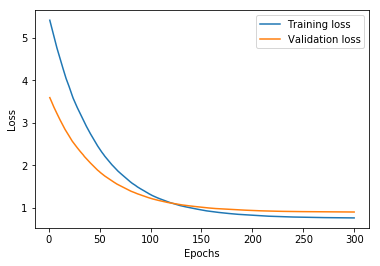

In [35]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## tf.keras 모델의 저장과 복원

In [36]:
model.save_weights('simple_weights.h5')

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_weights.h5')

In [38]:
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 700us/sample - loss: 0.9510


0.9510169339179992

In [39]:
model.save('simple_model.h5')

In [40]:
model = tf.keras.models.load_model('simple_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 737us/sample - loss: 0.9510


0.9510169339179992

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                                 monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(patience=5)]
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 961us/sample - loss: 4.3121 - val_loss: 2.4307
Epoch 2/300
120/120 [==============================] - 0s 216us/sample - loss: 4.2437 - val_loss: 2.3919
Epoch 3/300
120/120 [==============================] - 0s 138us/sample - loss: 4.1755 - val_loss: 2.3530
Epoch 4/300
120/120 [==============================] - 0s 176us/sample - loss: 4.1077 - val_loss: 2.3160
Epoch 5/300
120/120 [==============================] - 0s 132us/sample - loss: 4.0425 - val_loss: 2.2801
Epoch 6/300
120/120 [==============================] - 0s 178us/sample - loss: 3.9794 - val_loss: 2.2446
Epoch 7/300
120/120 [==============================] - 0s 148us/sample - loss: 3.9167 - val_loss: 2.2102
Epoch 8/300
120/120 [==============================] - 0s 182us/sample - loss: 3.8555 - val_loss: 2.1761
Epoch 9/300
120/120 [==============================] - 0s 126us/sample - loss: 3.7957 - val_loss: 2.1432
Epoch 10/3

Epoch 78/300
120/120 [==============================] - 0s 104us/sample - loss: 1.5675 - val_loss: 0.9990
Epoch 79/300
120/120 [==============================] - 0s 103us/sample - loss: 1.5526 - val_loss: 0.9926
Epoch 80/300
120/120 [==============================] - 0s 140us/sample - loss: 1.5378 - val_loss: 0.9863
Epoch 81/300
120/120 [==============================] - 0s 93us/sample - loss: 1.5237 - val_loss: 0.9800
Epoch 82/300
120/120 [==============================] - 0s 96us/sample - loss: 1.5094 - val_loss: 0.9737
Epoch 83/300
120/120 [==============================] - 0s 99us/sample - loss: 1.4951 - val_loss: 0.9678
Epoch 84/300
120/120 [==============================] - 0s 96us/sample - loss: 1.4816 - val_loss: 0.9620
Epoch 85/300
120/120 [==============================] - 0s 97us/sample - loss: 1.4683 - val_loss: 0.9563
Epoch 86/300
120/120 [==============================] - 0s 100us/sample - loss: 1.4550 - val_loss: 0.9508
Epoch 87/300
120/120 [=============================

Epoch 155/300
120/120 [==============================] - 0s 100us/sample - loss: 0.9649 - val_loss: 0.7835
Epoch 156/300
120/120 [==============================] - 0s 107us/sample - loss: 0.9614 - val_loss: 0.7829
Epoch 157/300
120/120 [==============================] - 0s 99us/sample - loss: 0.9582 - val_loss: 0.7823
Epoch 158/300
120/120 [==============================] - 0s 103us/sample - loss: 0.9552 - val_loss: 0.7818
Epoch 159/300
120/120 [==============================] - 0s 119us/sample - loss: 0.9520 - val_loss: 0.7812
Epoch 160/300
120/120 [==============================] - 0s 95us/sample - loss: 0.9485 - val_loss: 0.7807
Epoch 161/300
120/120 [==============================] - 0s 106us/sample - loss: 0.9456 - val_loss: 0.7802
Epoch 162/300
120/120 [==============================] - 0s 170us/sample - loss: 0.9427 - val_loss: 0.7797
Epoch 163/300
120/120 [==============================] - 0s 89us/sample - loss: 0.9399 - val_loss: 0.7793
Epoch 164/300
120/120 [=================

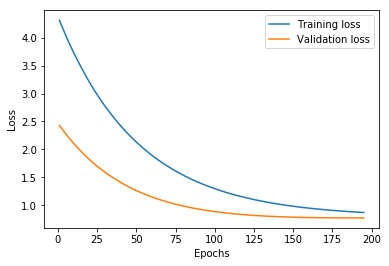

In [42]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

저장된 모델 복원:

In [43]:
model = tf.keras.models.load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 633us/sample - loss: 1.0156


1.01560928106308

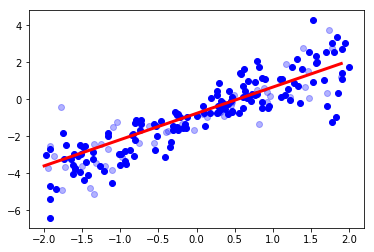

In [44]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()

## 계산 그래프 시각화하기

In [45]:
tf.keras.backend.clear_session()

In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [47]:
callback_list = [tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    callbacks=callback_list, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 1ms/sample - loss: 15.4731 - val_loss: 10.6123
Epoch 2/300
105/105 [==============================] - 0s 82us/sample - loss: 15.1683 - val_loss: 10.4251
Epoch 3/300
105/105 [==============================] - 0s 93us/sample - loss: 14.8829 - val_loss: 10.2093
Epoch 4/300
105/105 [==============================] - 0s 165us/sample - loss: 14.5672 - val_loss: 10.0197
Epoch 5/300
105/105 [==============================] - 0s 152us/sample - loss: 14.2783 - val_loss: 9.8419
Epoch 6/300
105/105 [==============================] - 0s 161us/sample - loss: 14.0028 - val_loss: 9.6448
Epoch 7/300
105/105 [==============================] - 0s 154us/sample - loss: 13.7094 - val_loss: 9.4759
Epoch 8/300
105/105 [==============================] - 0s 177us/sample - loss: 13.4426 - val_loss: 9.2753
Epoch 9/300
105/105 [==============================] - 0s 125us/sample - loss: 13.1499 - val_loss: 9.1063
E

Epoch 78/300
105/105 [==============================] - 0s 210us/sample - loss: 3.5177 - val_loss: 2.8435
Epoch 79/300
105/105 [==============================] - 0s 284us/sample - loss: 3.4563 - val_loss: 2.8045
Epoch 80/300
105/105 [==============================] - 0s 108us/sample - loss: 3.3985 - val_loss: 2.7677
Epoch 81/300
105/105 [==============================] - 0s 136us/sample - loss: 3.3432 - val_loss: 2.7290
Epoch 82/300
105/105 [==============================] - 0s 106us/sample - loss: 3.2873 - val_loss: 2.6918
Epoch 83/300
105/105 [==============================] - 0s 185us/sample - loss: 3.2311 - val_loss: 2.6571
Epoch 84/300
105/105 [==============================] - 0s 133us/sample - loss: 3.1813 - val_loss: 2.6240
Epoch 85/300
105/105 [==============================] - 0s 113us/sample - loss: 3.1302 - val_loss: 2.5883
Epoch 86/300
105/105 [==============================] - 0s 240us/sample - loss: 3.0761 - val_loss: 2.5549
Epoch 87/300
105/105 [========================

Epoch 155/300
105/105 [==============================] - 0s 110us/sample - loss: 1.2756 - val_loss: 1.3300
Epoch 156/300
105/105 [==============================] - 0s 149us/sample - loss: 1.2651 - val_loss: 1.3209
Epoch 157/300
105/105 [==============================] - 0s 98us/sample - loss: 1.2527 - val_loss: 1.3121
Epoch 158/300
105/105 [==============================] - 0s 172us/sample - loss: 1.2409 - val_loss: 1.3042
Epoch 159/300
105/105 [==============================] - 0s 183us/sample - loss: 1.2299 - val_loss: 1.2965
Epoch 160/300
105/105 [==============================] - 0s 128us/sample - loss: 1.2189 - val_loss: 1.2880
Epoch 161/300
105/105 [==============================] - 0s 112us/sample - loss: 1.2080 - val_loss: 1.2803
Epoch 162/300
105/105 [==============================] - 0s 114us/sample - loss: 1.1982 - val_loss: 1.2731
Epoch 163/300
105/105 [==============================] - 0s 118us/sample - loss: 1.1892 - val_loss: 1.2662
Epoch 164/300
105/105 [===============

코랩을 사용하거나 주피터 노트북을 로컬 컴퓨터에서 실행하는 경우엔 아래 두 개의 코드 셀의 주석을 삭제하고 실행하면 텐서보드를 노트북에 임베딩시킬 수 있습니다.

In [ ]:
# %load_ext tensorboard.notebook

In [ ]:
# %tensorboard --logdir logs --port 6006

<img src="tensorboard-1.png">

<img src="tensorboard-2.png">

In [50]:
input = tf.keras.Input(shape=(784,))
hidden = tf.keras.layers.Dense(100)(input)
output = tf.keras.layers.Dense(10)(hidden)

model = tf.keras.Model(input, output)

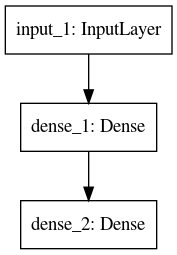

In [51]:
tf.keras.utils.plot_model(model, to_file='model_1.png')

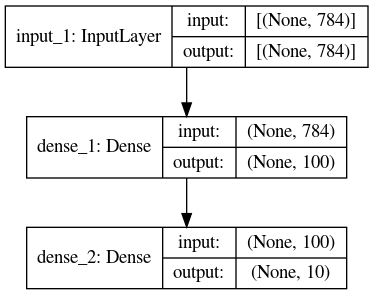

In [52]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model_2.png')